<a href="https://colab.research.google.com/github/abrham17/n_gram_implementations/blob/main/n_gram_implem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!apt-get install fonts-sil-abyssinica -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-sil-abyssinica
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 1,069 kB of archives.
After this operation, 1,302 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-sil-abyssinica all 2.100-3 [1,069 kB]
Fetched 1,069 kB in 1s (992 kB/s)
Selecting previously unselected package fonts-sil-abyssinica.
(Reading database ... 122071 files and directories currently installed.)
Preparing to unpack .../fonts-sil-abyssinica_2.100-3_all.deb ...
Unpacking fonts-sil-abyssinica (2.100-3) ...
Setting up fonts-sil-abyssinica (2.100-3) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# **N-gram Implementation**


You can access this corpus using this link:
link.https://drive.google.com/file/d/1WnuCIeZglWU0uty8-uMOBwOWQM-zAHBJ/view?usp=shari
ng
The corpus may require a good size of RAM to load; hence you can make use of
Google Collab, Kaggle or more if your device is incapable. and try to avoid using variables to
store the result of the each part so that you can use it later since it is a big data it will take a lot
of your memory and you will run out of it.


NOTE: IF YOU WANT TO WORK ON ANOTHER CORPUS THEN YOU ARE WELCOME TO
DO SO. IF YOU DO MAKE SURE TO CHANGE UP SOME OF THE QUESTIONS TO
ACCOMMODATE YOUR DATASET EG. 1.4 AND 1.6

In [5]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


**1.1 Create n-grams for n=1, 2, 3, 4. You can show sample prints.**

creating 1, 2, 3 , 4 grams from dataset.txt. If there is a stop word (as specified in question 4) if will not include in the grams.


In [6]:
from google.colab import drive
import re
drive.mount("/content/drive")

def corpus_ngram(n , stop_word=None):
     try:
         output_file = "/content/drive/MyDrive/corpus.txt"
         with open(output_file, "r", encoding="utf-8") as f:
             text = f.read()
         words = re.split(r'(\W+)', text.strip())
         words = [w for w in words if w.strip()]

         if stop_word is not None:
             words = [word for word in words if word not in stop_word]
         return [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]

     except Exception as e:
         print(f"Exception: {e}")
uningram = corpus_ngram(1)
bigram = corpus_ngram(2)
trigram = corpus_ngram(3)
qatragram = corpus_ngram(4)
for i in range(10):
  print(uningram[i])
  print(bigram[i])
  print(trigram[i])
  print(qatragram[i])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
('ምን',)
('ምን', 'መሰላችሁ')
('ምን', 'መሰላችሁ', '? (')
('ምን', 'መሰላችሁ', '? (', 'አንባቢያን')
('መሰላችሁ',)
('መሰላችሁ', '? (')
('መሰላችሁ', '? (', 'አንባቢያን')
('መሰላችሁ', '? (', 'አንባቢያን', ') ')
('? (',)
('? (', 'አንባቢያን')
('? (', 'አንባቢያን', ') ')
('? (', 'አንባቢያን', ') ', 'ኢትዮጵያ')
('አንባቢያን',)
('አንባቢያን', ') ')
('አንባቢያን', ') ', 'ኢትዮጵያ')
('አንባቢያን', ') ', 'ኢትዮጵያ', 'በተደጋጋሚ')
(') ',)
(') ', 'ኢትዮጵያ')
(') ', 'ኢትዮጵያ', 'በተደጋጋሚ')
(') ', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው')
('ኢትዮጵያ',)
('ኢትዮጵያ', 'በተደጋጋሚ')
('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው')
('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት')
('በተደጋጋሚ',)
('በተደጋጋሚ', 'ጥሪው')
('በተደጋጋሚ', 'ጥሪው', 'ደርሷት')
('በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው')
('ጥሪው',)
('ጥሪው', 'ደርሷት')
('ጥሪው', 'ደርሷት', 'ልትታደመው')
('ጥሪው', 'ደርሷት', 'ልትታደመው', 'ያልቻለችው')
('ደርሷት',)
('ደርሷት', 'ልትታደመው')
('ደርሷት', 'ልትታደመው', 'ያልቻለችው')
('ደርሷት', 'ልትታደመው', 'ያልቻለችው', 'የአለም')
('ልትታደመው',)
('ልትታደመው', 'ያልቻለችው')
('ልትታደመው', 'ያልቻለችው', 'የአለም')
('ልትታደመው', 'ያልቻለ

**1.2 Calculate probabilities of n-grams and find the top 10 most likely n-grams for all n.**

used a dictionary for simpler access if needed in another times.


In [7]:
def calculate_probability(ngrams , amount=10):
    return dict(sorted(((ngram, count / len(ngrams)) for ngram, count in Counter(ngrams).items()),key=lambda item: item[1], reverse=True)[:amount])

print(f"top 10 unigram {calculate_probability(uningram)}")

top 10 unigram {(' ። ',): 0.022575064928581485, ('ነው',): 0.013514283511508452, ('፡፡ ',): 0.012004114647540564, ('፣ ',): 0.010399176365921015, ('። ',): 0.008798850242313859, ('ላይ',): 0.008744524119796006, (' ፣ ',): 0.004529730173343787, ('ውስጥ',): 0.004012913532547889, ('ወደ',): 0.003835426567427705, ('፤ ',): 0.0037990391901439897}


**1.3 Calculate the conditional probability of a word given the previous word using bigrams.**

---



calculating conditional probabilites in bigrams using the formula:

P(B|A) = P(B and A) / P(A)

for instance to calculate the conditional probability of "ታሪካዊ" in the bigram "ኢትዮጵያ ታሪካዊ"

P(ታሪካዊ|ኢትዮጵያ) = P(ኢትዮጵያ ታሪካዊ)/P(ኢትዮጵያ)

In [9]:
def conditional_probability( sample_grams="ኢትዮጵያ ታሪካዊ"):
    words = sample_grams.split(" ")
    bigram_count = Counter(bigram)
    unigram_count = Counter(uningram)
    if tuple(words) in bigram_count and tuple([words[0]]) in unigram_count:
        probability = bigram_count[tuple(words)] / unigram_count[tuple([words[0]])]
    else:
        probability = 0
    return probability
print(f"condiftional probability of  {'ታሪካዊ'} in bigram {'ኢትዮጵያ ታሪካዊ'} {conditional_probability()}")
print(f"condiftional probability of  {'ምን'} in bigram {'ምን መሰላችሁ'} {conditional_probability('ምን መሰላችሁ')}")

condiftional probability of  ታሪካዊ in bigram ኢትዮጵያ ታሪካዊ 0.000302259143339086
condiftional probability of  ምን in bigram ምን መሰላችሁ 0.008140165378880303


**1.4 Remove common stopwords and recompute bigram and trigram frequencies, find
the top 10 n-grams; n=1,2,3,4.(OPTIONAL) # FIND THE MOST COMMON AMHARIC
STOPWORDS BY YOURSELF**

The function ,"recompute_bigram_trigram", recompute the bigram and trigram again removing amharic stop words. this stop words are passed to the function corpus_ngram which has default None for stop words.

In [10]:
amharic_stop_words = [
    "እኔ", "አንቺ", "አንተ", "እሱ", "እሷ", "እኛ", "እነሱ",
    "ይህ", "ያ", "ይች", "እነዚህ",
    "እና", "ወይም", "ነገር ግን", "እንዲሁም",
    "ላይ", "ስለ", "ከ", "በ", "ማዶ", "ውስጥ",
    "እየ", "ሲ", "የሚ", "ይሄ",
    "ነው", "ናት", "አለ", "አሉ", "እንደ", "የት", "ማን", "ምን",
    "እንደዚህ", "በዚህ", "ይህን", "ይሄን", "ይሆናል",
]

unigrams_filtered = corpus_ngram(1, stop_word=amharic_stop_words)
bigrams_filtered = corpus_ngram(2, stop_word=amharic_stop_words)
trigrams_filtered = corpus_ngram(3, stop_word=amharic_stop_words)

def recompute_bigram_trigram():
  return calculate_probability(bigrams_filtered) , calculate_probability(trigrams_filtered)

print(f"top 10 bigram {recompute_bigram_trigram()[0]}")
print(f"top 10 trigram {recompute_bigram_trigram()[1]}")


top 10 bigram {('ነበር', ' ። '): 0.001099025860119906, ('ዓ', 'ም'): 0.0010883791232351267, ('ነበር', '፡፡ '): 0.0005784199170480326, ('ናቸው', ' ። '): 0.0005529237839818503, ('ነገር', 'ግን'): 0.000545261544278731, ('/', 'ር'): 0.0005124564385227689, ('ብቻ', 'ሳይሆን'): 0.00039306436963521403, ('ነበር', '። '): 0.00038668120015280627, ('ዶ', '/'): 0.00038546303803784295, ('አዲስ', 'አበባ'): 0.0003820034576313471}
top 10 trigram {('ዶ', '/', 'ር'): 0.0003817841931014041, ('እ', 'ኤ', 'አ'): 0.00020312853514456826, (' ። ', 'ነገር', 'ግን'): 0.00014906649982393295, (' ። ', 'ይሁን', 'እንጂ'): 0.0001223278410747679, ('፡፡ ', 'ነገር', 'ግን'): 0.00012210857189140343, ('ወ', '/', 'ሮ'): 0.00012048841625876609, ('ም', 'ኢሳት', 'ዜና'): 0.00011812518172694923, ('ዓ', '/', 'ም'): 0.00011341089428461352, ('ጽ', '/', 'ቤት'): 8.444299883790987e-05, ('/', 'ም', 'ኢሳት'): 7.403989424939646e-05}


**1.5 Create word clouds for unigrams, bigrams, and trigrams before and after stop word removal. (OPTIONAL)**

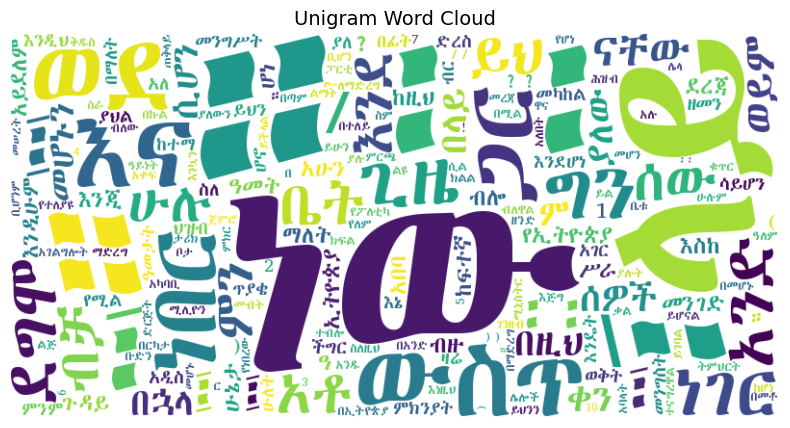

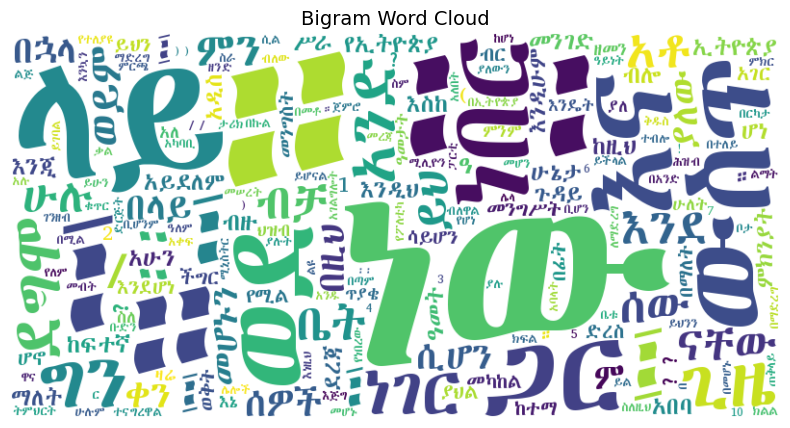

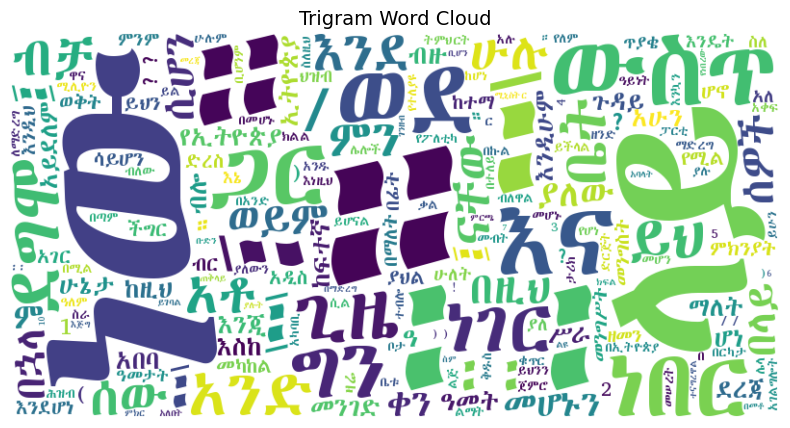

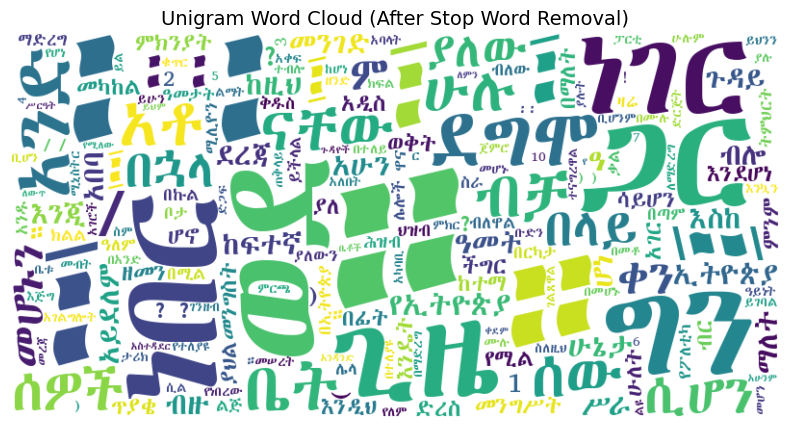

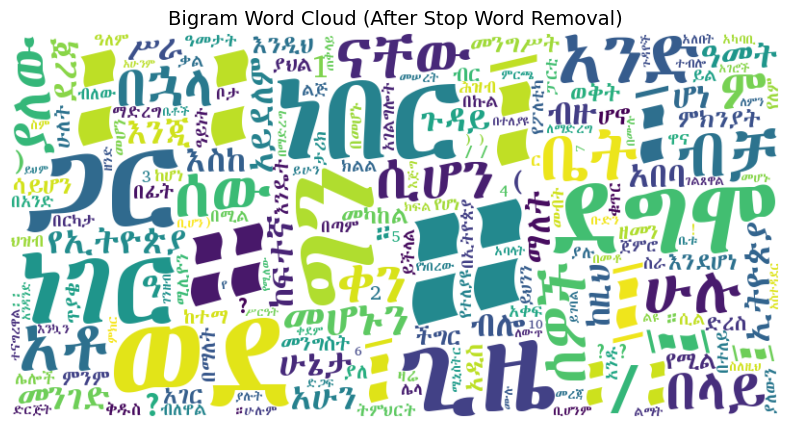

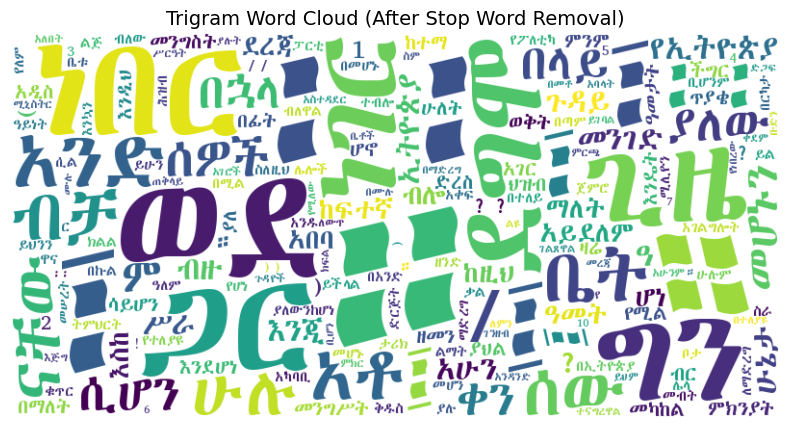

In [22]:
def generate_wordcloud(ngrams, title="Word Cloud for Amharic Corpus", font_path="path/to/amharic-font.ttf"):
    if isinstance(ngrams, list):
        ngrams = [item[0] if isinstance(item, tuple) else item for item in ngrams]

    ngram_freq = Counter(ngrams)

    wordcloud = WordCloud(
        width=800, height=400,
        background_color="white",
        font_path=font_path
    ).generate_from_frequencies(ngram_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

amharic_font_path = "/usr/share/fonts/truetype/abyssinica/AbyssinicaSIL-Regular.ttf"

generate_wordcloud(uningram, "Unigram Word Cloud", font_path=amharic_font_path)
generate_wordcloud(bigram, "Bigram Word Cloud", font_path=amharic_font_path)
generate_wordcloud(trigram, "Trigram Word Cloud", font_path=amharic_font_path)

generate_wordcloud(unigrams_filtered, "Unigram Word Cloud (After Stop Word Removal)", font_path=amharic_font_path)
generate_wordcloud(bigrams_filtered, "Bigram Word Cloud (After Stop Word Removal)", font_path=amharic_font_path)
generate_wordcloud(trigrams_filtered, "Trigram Word Cloud (After Stop Word Removal)", font_path=amharic_font_path)

**1.6 What is the probability of the sentence. "ኢትዮጵያ ታሪካዊ ሀገር ናት ". You can also try more sentences.**

In order to calculate the probability of word combinations, "ኢትዮጵያ ታሪካዊ ሀገር ናት".


1.   count the number of words and prepare n gram based on the word count
2. Count how many times the word combination happens in the ngram 3
3  Divide the number of times the word combination in ngram by the total number of ngrams




In [23]:
word_pro = "ኢትዮጵያ ታሪካዊ ሀገር ናት"
def calcualte_pro_of_specfic_word(word):
  word_count = word.split(" ")
  ngrams = corpus_ngram(len(word_count))
  counts = Counter(ngrams)
  return counts[tuple(word)] / len(ngrams)
print(f"word combination for 'ኢትዮጵያ ታሪካዊ ሀገር ናት' is {calcualte_pro_of_specfic_word(word_pro)}")

word combination for 'ኢትዮጵያ ታሪካዊ ሀገር ናት' is 0.0


**1.7 Generate random sentences using n-grams; explain what happens as n-increases based on your output.**

Generating a random number requires the probability of total ngrams.

**steps**:


1.   preparing ngrams based on input n
2.   selecting words with highest probability
3.   creating a sentence using the the highest probability consisting of n words



In [24]:
def generate_random_sentence(n_gram = 1 , number_of_words=10):
  ngram = corpus_ngram(n_gram)
  words_highest_pro = calculate_probability(ngram , number_of_words)
  words = [key[0] for key in words_highest_pro.keys()]
  return " ".join(words)
print(f" Generated 10 word combination from trigrams is {generate_random_sentence(1)}")

 Generated 10 word combination from trigrams is  ።  ነው ፡፡  ፣  ።  ላይ  ፣  ውስጥ ወደ ፤ 


# OPTIONAL

**#2 Evaluate these Language Models Using Intrinsic Evaluation Metho(Perplexity)**

In [27]:
import numpy as np

def calculate_perplexity(sentence, n=2):
    words = sentence.split(" ")
    probabilities = [conditional_probability(" ".join(words[i:i+n])) for i in range(len(words)-n+1)]

    probabilities = [p if p > 0 else 1e-10 for p in probabilities]

    return np.exp(-np.mean(np.log(probabilities)))

print(f"Perplexity: {calculate_perplexity('ኢትዮጵያ ታሪካዊ ሀገር ናት', n=1)}")


Perplexity: 10000000000.000004


**#3 Evaluate these Language Models Using Extrinsic Evaluation Method  
You can make use of any task convenient to you to evaluate the n-gram models you have created.**

In [ ]:
def extrinsic_evaluation():
  pass